In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.utils.extmath import cartesian
import csv
import matplotlib.patches as mpatches
import sys

fArr=[]
with open(r"C:\Users\manaskan\Desktop\PSU\fashion_mnist_train.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        if ('label' not in row[0]) and (int(row[0]) < 10):
             fArr.append(row)

In [2]:
flist=list(fArr)
cArr=[]
cArray=[[230, 25, 75],[60, 180, 75],[255, 225, 25],[0, 130, 200],[245, 130, 48],[145, 30, 180],[70, 240, 240],[240, 50, 230],[250, 190, 190],[128, 0, 0]]
for idx,row in enumerate(flist):
    flist[idx]=list(flist[idx])+cArray[int(row[0])]


In [3]:
fArray=np.array(flist)
#np.random.shuffle(fArray)
nArray=fArray[0:1000]
dataArray=np.divide(fArray[:,1:785].astype(int),255)
nArray=np.asfarray(nArray,float)
srcSpace=fArray[:,1:785].astype(int)
srcSpace=np.divide(srcSpace,255)
normcArray=np.divide(cArray,255)

In [4]:
# SETUP datapoints
pixels=nArray[:,1:785]
pixels=np.divide(pixels,255)
colors=nArray[:,785:788]
colors=np.divide(colors,255)

In [5]:
# SETUP 2D SPACE
x = np.linspace(0, 1, 40)
y = np.linspace(0, 1, 25)
nodes = cartesian([x,y])
np.random.shuffle(nodes)

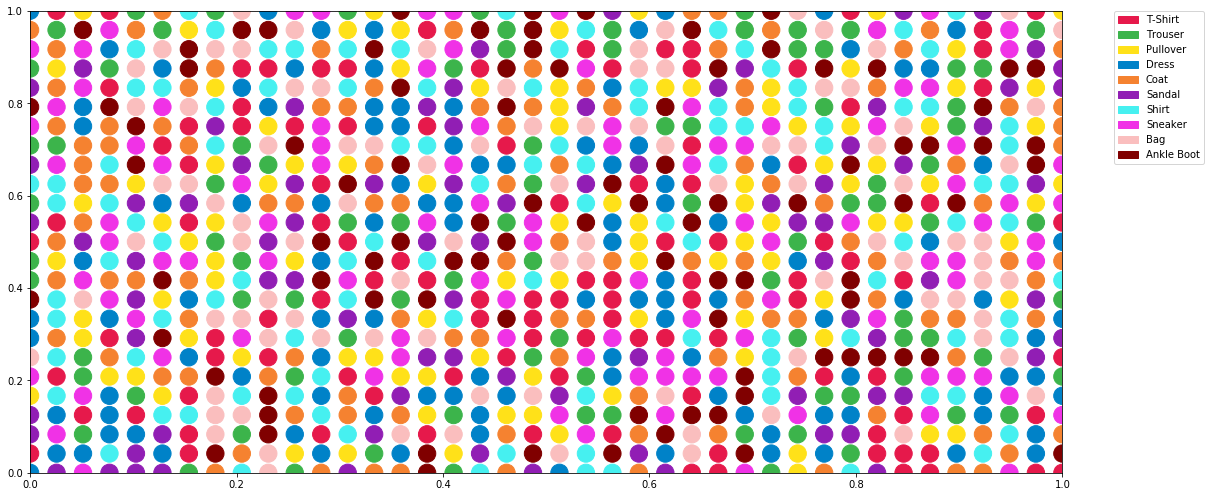

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nodes[:,0],nodes[:,1],color=colors,s=300)
axes = plt.gca()
axes.set_xlim([np.min(nodes[:,0]),np.max(nodes[:,0])])
axes.set_ylim([np.min(nodes[:,1]),np.max(nodes[:,1])])    
fig.set_size_inches(18.5,8.5)

tshirt = mpatches.Patch(color=np.divide(cArray[0],255), label='T-Shirt')
trouser = mpatches.Patch(color=np.divide(cArray[1],255), label='Trouser')
pullover = mpatches.Patch(color=np.divide(cArray[2],255), label='Pullover')
dress = mpatches.Patch(color=np.divide(cArray[3],255), label='Dress')
coat = mpatches.Patch(color=np.divide(cArray[4],255), label='Coat')
sandal = mpatches.Patch(color=np.divide(cArray[5],255), label='Sandal')
shirt = mpatches.Patch(color=np.divide(cArray[6],255), label='Shirt')
sneaker = mpatches.Patch(color=np.divide(cArray[7],255), label='Sneaker')
bag = mpatches.Patch(color=np.divide(cArray[8],255), label='Bag')
ankleboot = mpatches.Patch(color=np.divide(cArray[9],255), label='Ankle Boot')

plt.legend(handles=[tshirt, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankleboot], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [7]:
#print(dataArray.shape)
for i in range(10000):
    sys.stdout.write("\r" + str(i))
    sys.stdout.flush()
    random_idx=np.random.randint(0,60000)
    #random_pixel=np.array(fArray[random_idx,1:785],ndmin=2).astype(int)
    random_pixel=np.array(dataArray[random_idx],ndmin=2).astype(int)
    #random_pixel=np.divide(random_pixel,255)
    #print(random_pixel.shape)
    pixel_distances = cdist(pixels,random_pixel,'euclidean')
    winning_node_index = np.argmin(pixel_distances)
    winning_node = np.array([nodes[winning_node_index]])
    node_distances = cdist(nodes,winning_node,'euclidean')
    gaussian = np.exp(-1*node_distances/0.03)
    update = (pixels[winning_node_index]-pixels)*gaussian*0.3
    pixels = pixels + update
print("\nTraining Done!")

9999
Training Done!


In [8]:
for idx,pixel in enumerate(pixels):
    sys.stdout.write("\r" + str(idx))
    sys.stdout.flush()
    pixel_distances = cdist(dataArray,np.array(pixel,ndmin=2),'euclidean')
    winning_datapoint = np.argmin(pixel_distances)
    colors[idx] = np.divide(fArray[winning_datapoint,785:788].astype(int),255)
    if(colors[idx]) not in np.divide(cArray,255):
        print("Incorrect Pixel value")
print("\nLabeling Done!")

999
Labeling Done!


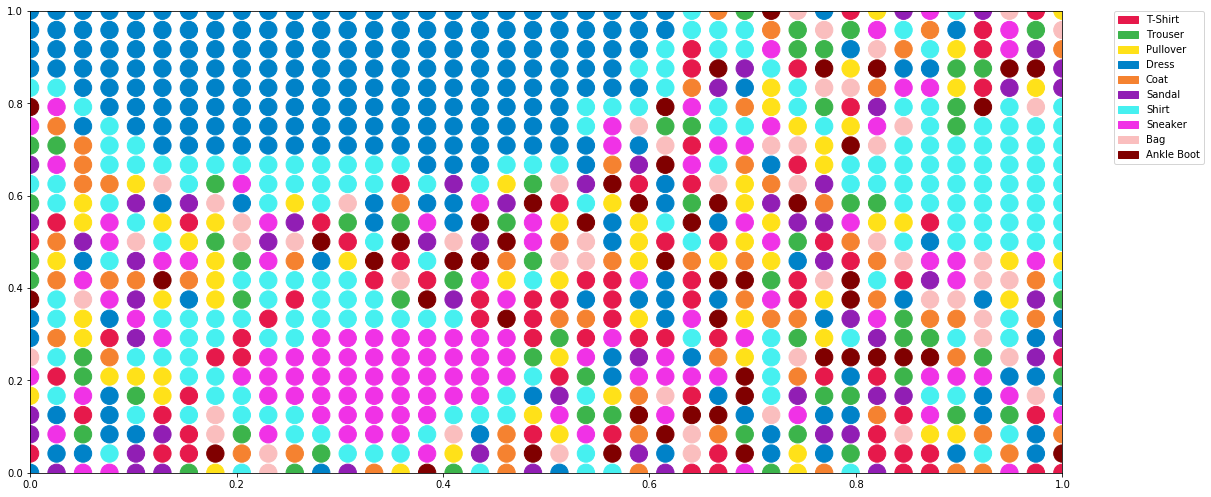

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nodes[:,0],nodes[:,1],color=colors,s=300)
axes = plt.gca()
axes.set_xlim([np.min(nodes[:,0]),np.max(nodes[:,0])])
axes.set_ylim([np.min(nodes[:,1]),np.max(nodes[:,1])])    
fig.set_size_inches(18.5,8.5)

tshirt = mpatches.Patch(color=np.divide(cArray[0],255), label='T-Shirt')
trouser = mpatches.Patch(color=np.divide(cArray[1],255), label='Trouser')
pullover = mpatches.Patch(color=np.divide(cArray[2],255), label='Pullover')
dress = mpatches.Patch(color=np.divide(cArray[3],255), label='Dress')
coat = mpatches.Patch(color=np.divide(cArray[4],255), label='Coat')
sandal = mpatches.Patch(color=np.divide(cArray[5],255), label='Sandal')
shirt = mpatches.Patch(color=np.divide(cArray[6],255), label='Shirt')
sneaker = mpatches.Patch(color=np.divide(cArray[7],255), label='Sneaker')
bag = mpatches.Patch(color=np.divide(cArray[8],255), label='Bag')
ankleboot = mpatches.Patch(color=np.divide(cArray[9],255), label='Ankle Boot')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.legend(handles=[tshirt, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankleboot])
plt.legend(handles=[tshirt, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankleboot], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

When I run the SOM algorithm for the dataset for 2D space, I see that the points usually converge to two labels predominantly. I am not sure why this is. Could it be possible that this is because we cannot map the 784D dataset to 2D space?